In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import Plotting_settings

In [7]:
blades = pd.read_csv('data/Blades_new.csv')
blades.head()

,Product_Name,Price,Speed,Control,Weight (g)
0,Andro Blax All+,35.99,85.0,95.0,73.0
1,Andro Blax Off,35.99,92.0,92.0,78.0
2,Andro CS7 Pro,39.99,92.0,94.0,90.0
3,Andro CS7 Tour,39.99,94.0,93.0,90.0
4,Andro CS7 Velocity,39.99,96.0,92.0,90.0


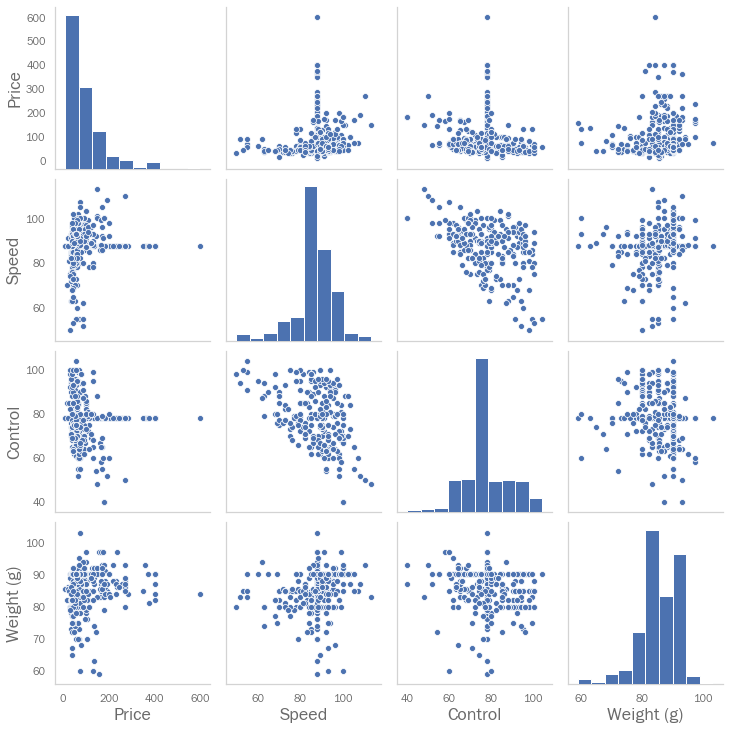

In [23]:
#Visualizing Pair Plots
sns.pairplot(data = blades)

**Relationships**
- As the blade speed increases the blade control decreases
- As the blade speed increases the weight of the blade also increases

## Weight

In [29]:
rang = blades['Weight (g)'].max() - blades['Weight (g)'].min()
print("The heaviest and lightest blades differ by {} grams".format(rang))

The heaviest and lightest blades differ by 44.0 grams


While 44 grams may not seem like a large difference, at the higher levels of ping pong it makes a significant difference. Typically heavier blades are favored by defensive players while lighter blades are favored by offensive players.

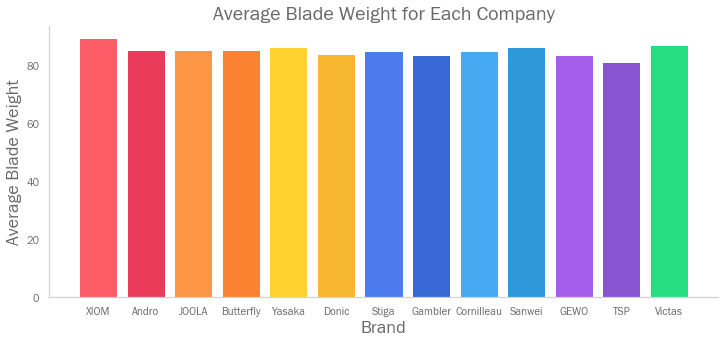

In [51]:
brands = ["XIOM", "Andro", "JOOLA", "Butterfly", "Yasaka", "Donic",  "Stiga", "Gambler", "Cornilleau",
          "Sanwei", "GEWO", "TSP", "Victas"]

colors = ["#fc5c65", "#eb3b5a", "#fd9644", "#fa8231", "#fed330", "#f7b731", "#4b7bec", "#3867d6","#45aaf2", "#2d98da", "#a55eea",
              "#8854d0", "#26de81", "#20bf6b", "#d1d8e0", "#a5b1c2", "#2bcbba", "#0fb9b1", "#778ca3", "#4b6584"]

new_blades = pd.DataFrame(index = brands, columns= ['Price_avg', 'Speed_avg', 'Control_avg', 'Weight_avg'])

#Create a bar chart with average price, spin, speed, and control for each brand
def combine_brands(data):
    for brand in brands:
        key_values = data['Product_Name'].apply(lambda x: x.find(brand) != -1).sort_values(ascending = False)
        indices = key_values.index[key_values.values == True]
        frame = data.iloc[indices].sort_index()
        new_blades.loc[brand,:] = [frame['Price'].mean(), frame['Speed'].mean(),
                                                   frame['Control'].mean(), frame['Weight (g)'].mean()]      
    return new_blades

#Function Call
combine_brands(blades)
plt.figure(figsize = (12, 5))
plt.xlabel('Brand')
plt.ylabel('Average Blade Weight')
plt.title('Average Blade Weight for Each Company')
i = 0
for index in new_blades.index:
    plt.bar(index, new_blades.loc[index, 'Weight_avg'], width = 0.8, color = colors[i])
    i+=1

**Key Takeaways**
- From this bar chart we can see that XIOM creates heavier blades, on average, and thus most likely specializes in defense. On the other hand TSP creates lighter blades, on average, and thus most likely specializes in offense.